In [13]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import warnings 

In [14]:
# Import master table
df = pd.read_csv('..\Data Wrangling - Capstone 2/master.csv', index_col=0)
df.head()

,ID,Tower,Floor,Unit,Area,Flat Type,No. of Rooms,Price,Price per SA,PL_no,Date_PASP,Date_ASP,Trans_Price,Payment_Terms,first_sale
0,One_VicTower 1A1A,Tower 1A,1,A,643,3BR + 2B + 1K,3BR,"16,137,000","25,096",PL1,03/07/2021,03/07/2021,"$13,958,000",A,03/07/2021
1,One_VicTower 1A1B,Tower 1A,1,B,444,2BR + 1B + 1OK,2BR,"10,613,000","23,903",PL1,03/07/2021,03/07/2021,"$9,604,000",C,03/07/2021
2,One_VicTower 1A1C,Tower 1A,1,C,438,2BR + 1B + 1OK,2BR,"10,739,000","24,518",PL1,10/07/2021,10/07/2021,"$9,718,000",C,NaN
3,One_VicTower 1A1D,Tower 1A,1,D,444,2BR + 1B + 1OK,2BR,"11,355,000","25,574",PL2,03/07/2021,03/07/2021,"$9,822,000",A,03/07/2021
4,One_VicTower 1A1E,Tower 1A,1,E,426,2BR + 1B + 1OK,2BR,"11,009,000","25,843",PL2,03/07/2021,03/07/2021,"$9,963,000",C,03/07/2021


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1049 non-null   object
 1   Tower          1049 non-null   object
 2   Floor          1049 non-null   int64 
 3   Unit           1049 non-null   object
 4   Area           1049 non-null   int64 
 5   Flat Type      1049 non-null   object
 6   No. of Rooms   1049 non-null   object
 7   Price          685 non-null    object
 8   Price per SA   685 non-null    object
 9   PL_no          685 non-null    object
 10  Date_PASP      501 non-null    object
 11  Date_ASP       501 non-null    object
 12  Trans_Price    501 non-null    object
 13  Payment_Terms  501 non-null    object
 14  first_sale     400 non-null    object
dtypes: int64(2), object(13)
memory usage: 131.1+ KB


In [16]:
df.shape

(1049, 15)

In [17]:
df.columns

Index(['ID', 'Tower', 'Floor', 'Unit', 'Area', 'Flat Type', 'No. of Rooms',
       'Price', 'Price per SA', 'PL_no', 'Date_PASP', 'Date_ASP',
       'Trans_Price', 'Payment_Terms', 'first_sale'],
      dtype='object')

In [18]:
# Clean data types
df['Price'] = pd.to_numeric(df['Price'].str.replace(",", "", regex=True))

df['Trans_Price'] = pd.to_numeric(df['Trans_Price'].str.replace(",", "", regex=True).str.replace("$","", regex=True))

df['Price per SA'] = pd.to_numeric(df['Price per SA'].str.replace(",", "", regex=True).str.replace("$","", regex=True))

df['Date_PASP'] = pd.to_datetime(df['Date_PASP'])

df['Date_ASP'] = pd.to_datetime(df['Date_ASP'])

df['first_sale'] = pd.to_datetime(df['first_sale'])

df.head()

,ID,Tower,Floor,Unit,Area,Flat Type,No. of Rooms,Price,Price per SA,PL_no,Date_PASP,Date_ASP,Trans_Price,Payment_Terms,first_sale
0,One_VicTower 1A1A,Tower 1A,1,A,643,3BR + 2B + 1K,3BR,16137000.0,25096.0,PL1,2021-03-07,2021-03-07,13958000.0,A,2021-03-07
1,One_VicTower 1A1B,Tower 1A,1,B,444,2BR + 1B + 1OK,2BR,10613000.0,23903.0,PL1,2021-03-07,2021-03-07,9604000.0,C,2021-03-07
2,One_VicTower 1A1C,Tower 1A,1,C,438,2BR + 1B + 1OK,2BR,10739000.0,24518.0,PL1,2021-10-07,2021-10-07,9718000.0,C,NaT
3,One_VicTower 1A1D,Tower 1A,1,D,444,2BR + 1B + 1OK,2BR,11355000.0,25574.0,PL2,2021-03-07,2021-03-07,9822000.0,A,2021-03-07
4,One_VicTower 1A1E,Tower 1A,1,E,426,2BR + 1B + 1OK,2BR,11009000.0,25843.0,PL2,2021-03-07,2021-03-07,9963000.0,C,2021-03-07


In [19]:
# More correlation if closer to 1 or -1.
df.corr(method ='pearson')

,Floor,Area,Price,Price per SA,Trans_Price
Floor,1.000000,0.030433,0.217573,0.805774,0.117684
Area,0.030433,1.000000,0.961327,0.371631,0.957518
Price,0.217573,0.961327,1.000000,0.603836,0.996907
Price per SA,0.805774,0.371631,0.603836,1.000000,0.505694
Trans_Price,0.117684,0.957518,0.996907,0.505694,1.000000


In [20]:
df.corr(method ='kendall')

,Floor,Area,Price,Price per SA,Trans_Price
Floor,1.000000,0.005542,0.239014,0.624491,0.141685
Area,0.005542,1.000000,0.731834,0.185690,0.740651
Price,0.239014,0.731834,1.000000,0.471601,0.936425
Price per SA,0.624491,0.185690,0.471601,1.000000,0.307765
Trans_Price,0.141685,0.740651,0.936425,0.307765,1.000000


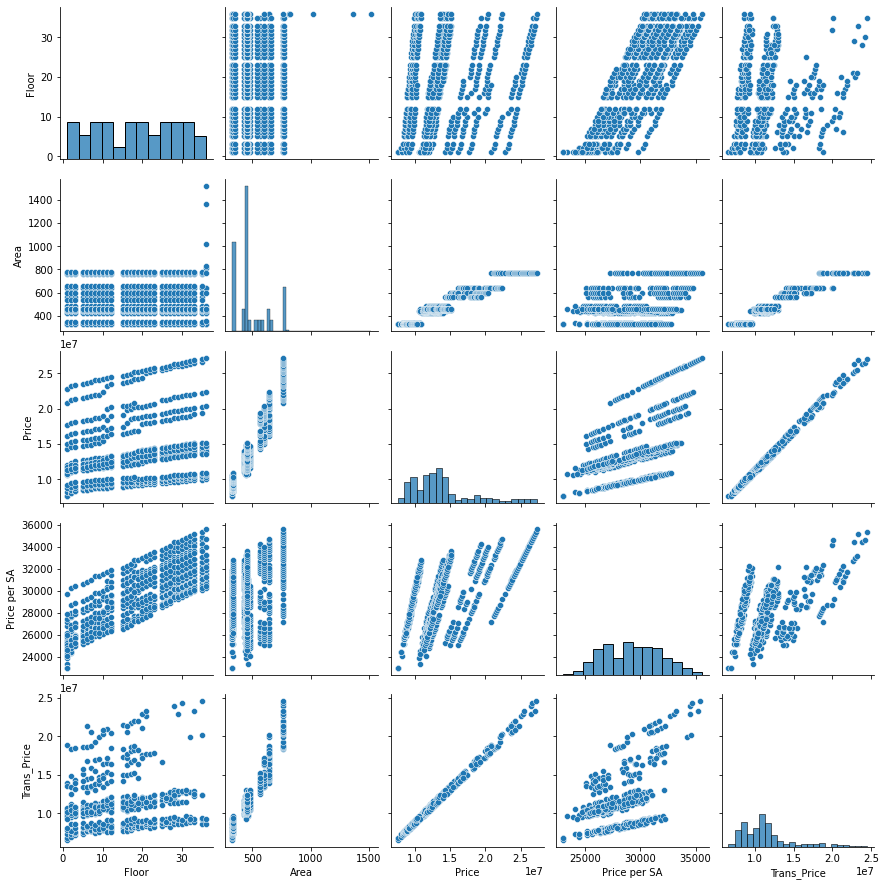

In [21]:
sns.pairplot(df)
plt.show()

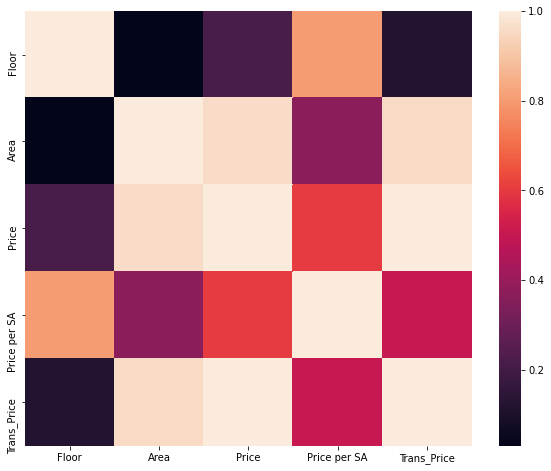

In [22]:
# Make a heatmap of the data 
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr());
plt.show()

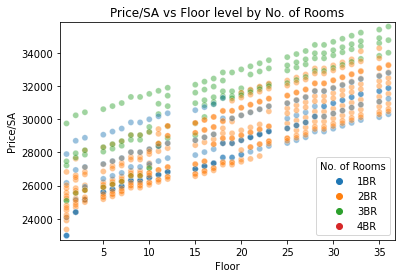

In [23]:
# Relationship between price per SA and floor level, grouped by no. of rooms
sns.scatterplot(x='Floor', y='Price per SA', data=df, hue='No. of Rooms', hue_order=['1BR','2BR','3BR','4BR'], alpha=0.45)
plt.margins(0.02)
plt.xlabel('Floor')
plt.ylabel('Price/SA')
plt.title('Price/SA vs Floor level by No. of Rooms')
plt.show()


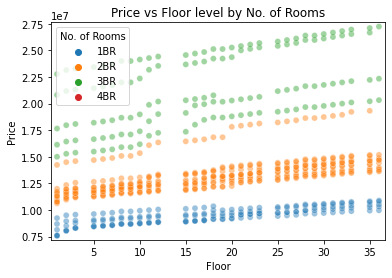

In [24]:
# Relationship between price and floor level, grouped by no. of rooms
sns.scatterplot(x='Floor', y='Price', data=df, hue='No. of Rooms', hue_order=['1BR','2BR','3BR','4BR'], alpha=0.45)
plt.margins(0.02)
plt.xlabel('Floor')
plt.ylabel('Price')
plt.title('Price vs Floor level by No. of Rooms')
plt.show()


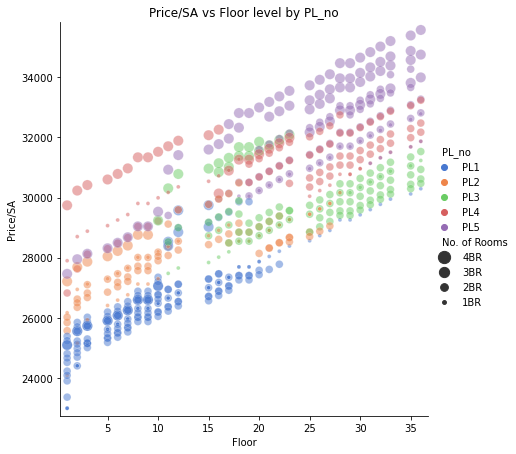

In [25]:
# Relationship between price per SA and floor level, grouped by Price List
sns.relplot(x='Floor', y='Price per SA', data=df, hue='PL_no', hue_order=['PL1','PL2','PL3','PL4','PL5'], size='No. of Rooms',
            sizes=(15, 150), size_order = ['4BR','3BR','2BR','1BR'], palette="muted", height = 6, alpha=0.5)
plt.margins(0.02)
plt.xlabel('Floor')
plt.ylabel('Price/SA')
plt.title('Price/SA vs Floor level by PL_no')
plt.show()


Text(0.5, 1.0, 'Average Price/SA vs PL_no')

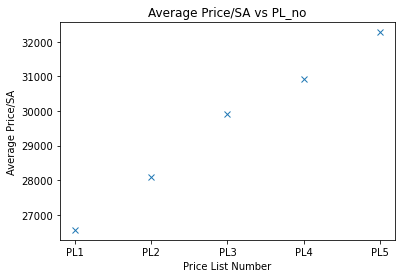

In [26]:
PL_mean = df.groupby('PL_no')['Price per SA'].mean()
plt.plot(PL_mean, marker = 'x', linestyle='None')
plt.xlabel('Price List Number')
plt.ylabel('Average Price/SA')
plt.title('Average Price/SA vs PL_no')


Later launched Price Lists tend to be higher priced, for more desirable high level flats.

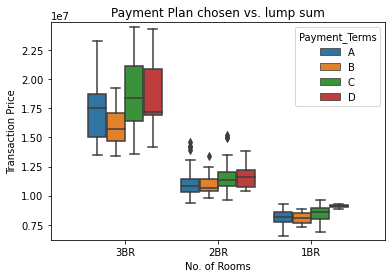

In [27]:
# Relationship between transaction price, payment plan, no. of rooms
sns.boxplot(x='No. of Rooms', y='Trans_Price', data=df, hue='Payment_Terms', hue_order=['A','B','C','D'])
plt.margins(0.02)
plt.xlabel('No. of Rooms')
plt.ylabel('Transaction Price')
plt.title('Payment Plan chosen vs. lump sum')
plt.show()

Payment_Terms
A    1.350161e+07
B    1.253314e+07
C    1.238986e+07
D    1.383157e+07
Name: Price, dtype: float64


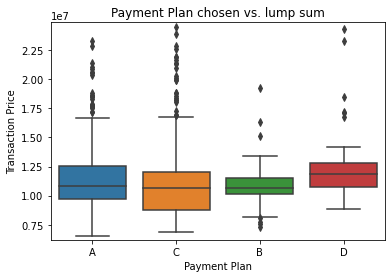

In [28]:
# Relationship between transaction price and payment plan
Payment_plan_mean = df.groupby('Payment_Terms')['Price'].mean()
print(Payment_plan_mean)

sns.boxplot(x='Payment_Terms', y='Trans_Price', data=df)
plt.margins(0.02)
plt.xlabel('Payment Plan')
plt.ylabel('Transaction Price')
plt.title('Payment Plan chosen vs. lump sum')
plt.show()

No notable differences observed from the payment plans vs. lump sum.

In [29]:
# further clean data before modelling
# columns to drop: 'ID', 'Flat Type' (duplicate with No. of Rooms), 'Price' (duplicate with Price/SA), 'first_sale', 'Date_PASP'
# df1, all_units = 'Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms'
# df2, pl_released = 'Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms', 'Price per SA', 'PL_no'
##### drop null rows then can predict price of flats with unreleased price list #####
# df3, sold = 'Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms', 'Price per SA', 'PL_no', 'Date_ASP', 'Trans_Price', 'Payment_Terms'

all_units = df.drop(['ID','Flat Type','Price','first_sale', 'Date_PASP', 'Price per SA', 'PL_no', 'Date_ASP', 'Trans_Price', 'Payment_Terms'],axis =1)
all_units.info()


pl_released = df.drop(['ID','Flat Type','Price','first_sale', 'Date_PASP', 'Date_ASP', 'Trans_Price', 'Payment_Terms'],axis =1)
pl_released = pl_released.dropna(0) #drop nan rows
pl_released.info()

sold = df.drop(['ID','Flat Type','Price','first_sale', 'Date_PASP'],axis =1)
sold = sold.dropna(0) #drop nan rows
sold.info()

Prediction = df[df.PL_no.isna()].drop(['ID','Flat Type','Price','first_sale', 'Date_PASP', 'Date_ASP', 'Trans_Price', 'Payment_Terms'],axis =1)
Prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tower         1049 non-null   object
 1   Floor         1049 non-null   int64 
 2   Unit          1049 non-null   object
 3   Area          1049 non-null   int64 
 4   No. of Rooms  1049 non-null   object
dtypes: int64(2), object(3)
memory usage: 81.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1048
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tower         685 non-null    object 
 1   Floor         685 non-null    int64  
 2   Unit          685 non-null    object 
 3   Area          685 non-null    int64  
 4   No. of Rooms  685 non-null    object 
 5   Price per SA  685 non-null    float64
 6   PL_no         685 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 42.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1049 non-null   object        
 1   Tower          1049 non-null   object        
 2   Floor          1049 non-null   int64         
 3   Unit           1049 non-null   object        
 4   Area           1049 non-null   int64         
 5   Flat Type      1049 non-null   object        
 6   No. of Rooms   1049 non-null   object        
 7   Price          685 non-null    float64       
 8   Price per SA   685 non-null    float64       
 9   PL_no          685 non-null    object        
 10  Date_PASP      501 non-null    datetime64[ns]
 11  Date_ASP       501 non-null    datetime64[ns]
 12  Trans_Price    501 non-null    float64       
 13  Payment_Terms  501 non-null    object        
 14  first_sale     400 non-null    datetime64[ns]
dtypes: datetime64[ns](3),

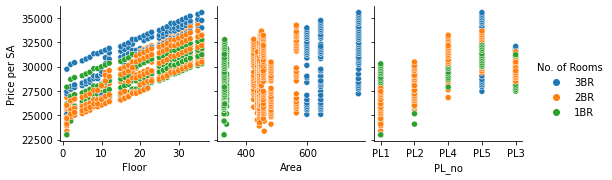

In [31]:
sns.pairplot(pl_released, y_vars = 'Price per SA', x_vars = ['Floor', 'Area', 'PL_no'], hue = 'No. of Rooms')

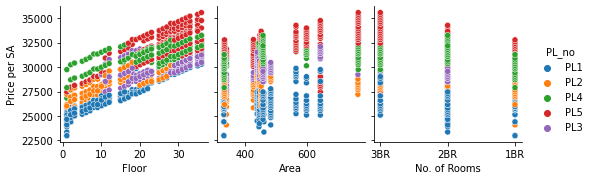

In [32]:
sns.pairplot(pl_released, y_vars = 'Price per SA', x_vars = ['Floor', 'Area', 'No. of Rooms'], hue = 'PL_no')

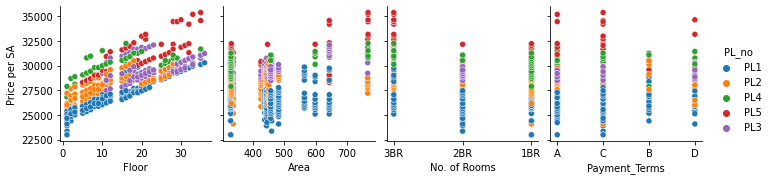

In [33]:
sns.pairplot(sold, y_vars = 'Price per SA', x_vars = ['Floor', 'Area', 'No. of Rooms', 'Payment_Terms'], hue = 'PL_no')

In [34]:
# Create test and train datasets
features = ['Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms', 'PL_no', 'Payment_Terms']
X = pd.get_dummies(sold[features])

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

# target variable: Price per SA
y = sold['Price per SA']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 975
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             500 non-null    float64
 1   Floor             500 non-null    int64  
 2   Area              500 non-null    int64  
 3   Tower_Tower 1A    500 non-null    uint8  
 4   Tower_Tower 1B    500 non-null    uint8  
 5   Tower_Tower 2A    500 non-null    uint8  
 6   Tower_Tower 2B    500 non-null    uint8  
 7   Unit_A            500 non-null    uint8  
 8   Unit_B            500 non-null    uint8  
 9   Unit_C            500 non-null    uint8  
 10  Unit_D            500 non-null    uint8  
 11  Unit_E            500 non-null    uint8  
 12  Unit_F            500 non-null    uint8  
 13  Unit_G            500 non-null    uint8  
 14  Unit_H            500 non-null    uint8  
 15  Unit_J            500 non-null    uint8  
 16  Unit_K            500 non-null    uint8  
 1

In [36]:
# Create the model
model1 = sm.OLS(y_train,X_train)

# Fit the model
results = model1.fit()

# Evaluate the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price per SA   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     238.3
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.42e-198
Time:                        20:24:23   Log-Likelihood:                -2874.5
No. Observations:                 375   AIC:                             5797.
Df Residuals:                     351   BIC:                             5891.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9213.5385    390.441     23.598      0.000    8445.640    9981.437
Floor              155.2040      4.255     36.474      0.000     146.835     163.573
Area                14.9409      1.659      9.009      0.000      11.679      18.203
Tower_Tower 1A    2518.8160     85.569     29.436      0.000    2350.523    2687.109
Tower_Tower 1B    1972.2770    147.789     13.345      0.000    1681.615    2262.939
Tower_Tower 2A    2127.0105    120.996     17.579      0.000    1889.042    2364.979
Tower_Tower 2B    2595.4349    143.592     18.075      0.000    2313.027    2877.843
Unit_A            1471.4361    143.034     10.287      0.000    1190.125    1752.747
Unit_B             536.6873    153.683      3.492      0.001     234.432     838.942
Unit_C             948.7006    116.874      8.117      0.000     718.840    1178.561
Unit_D             799.1406    108.043      7.396      0.000     586.647    1011.634
Unit_E            1024.5971    120.604      8.496      0.000     787.400    1261.794
Unit_F             710.8516    105.948      6.709      0.000     502.478     919.225
Unit_G              64.4748    139.325      0.463      0.644    -209.542     338.492
Unit_H            1462.4715    227.303      6.434      0.000    1015.424    1909.519
Unit_J            1345.4973    201.364      6.682      0.000     949.465    1741.530
Unit_K             849.6815    209.561      4.055      0.000     437.529    1261.834
No. of Rooms_1BR  5105.4357    200.338     25.484      0.000    4711.423    5499.449
No. of Rooms_2BR  3024.1512     77.814     38.864      0.000    2871.110    3177.192
No. of Rooms_3BR  1083.9516    522.157      2.076      0.039      57.002    2110.901
PL_no_PL1          372.2088     87.123      4.272      0.000     200.861     543.557
PL_no_PL2         1467.1161     98.429     14.905      0.000    1273.531    1660.701
PL_no_PL3         1587.6394     99.760     15.915      0.000    1391.438    1783.841
PL_no_PL4         3037.1235    125.973     24.109      0.000    2789.368    3284.879
PL_no_PL5         2749.4507    147.592     18.629      0.000    2459.175    3039.726
Payment_Terms_A   2299.6526    109.918     20.921      0.000    2083.471    2515.834
Payment_Terms_B   2396.1693    126.071     19.007      0.000    2148.220    2644.118
Payment_Terms_C   2316.6483    105.391     21.981      0.000    2109.371    2523.925
Payment_Terms_D   2201.0683    129.638     16.979      0.000    1946.103    2456.033
==============================================================================
Omnibus:                       26.550   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.651
Skew:                          -0.523   Prob(JB):                     6.67e-09
Kurtosis:                       4.147   Cond. N

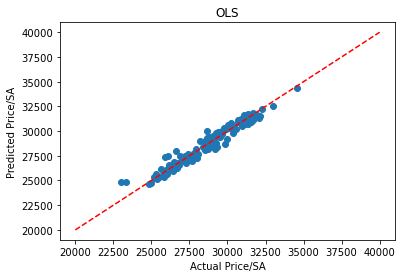

RMSE: 519.114 / MAE: 399.838 / R-squared: 0.94 / Adj. R-squared: 0.936


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

# Predict price per SA on X_test parameters
y_pred = results.predict(X_test)

# Build a scatterplot
_ = plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([20000, 40000], [20000, 40000], 'k--', color='r')

# Label axis
plt.ylabel('Predicted Price/SA')
plt.xlabel('Actual Price/SA')
plt.title('OLS')
plt.show()

print('RMSE: {} / MAE: {} / R-squared: {} / Adj. R-squared: {}'.format(
    round(math.sqrt(mean_squared_error(y_test, y_pred)), 3), round(mean_absolute_error(y_test, y_pred), 3), round(results.rsquared, 3), round(results.rsquared_adj, 3)))


In [38]:
# Create test and train datasets
features = ['Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms', 'PL_no']
X = pd.get_dummies(pl_released[features])

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

# target variable: Price per SA
y = pl_released['Price per SA']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1048
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             685 non-null    float64
 1   Floor             685 non-null    int64  
 2   Area              685 non-null    int64  
 3   Tower_Tower 1A    685 non-null    uint8  
 4   Tower_Tower 1B    685 non-null    uint8  
 5   Tower_Tower 2A    685 non-null    uint8  
 6   Tower_Tower 2B    685 non-null    uint8  
 7   Unit_A            685 non-null    uint8  
 8   Unit_B            685 non-null    uint8  
 9   Unit_C            685 non-null    uint8  
 10  Unit_D            685 non-null    uint8  
 11  Unit_E            685 non-null    uint8  
 12  Unit_F            685 non-null    uint8  
 13  Unit_G            685 non-null    uint8  
 14  Unit_H            685 non-null    uint8  
 15  Unit_J            685 non-null    uint8  
 16  Unit_K            685 non-null    uint8  
 

In [40]:
# Create the model
model2 = sm.OLS(y_train,X_train)

# Fit the model
results2 = model2.fit()

# Evaluate the model
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price per SA   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     633.9
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:24:26   Log-Likelihood:                -3919.2
No. Observations:                 513   AIC:                             7880.
Df Residuals:                     492   BIC:                             7970.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.107e+04    339.868     32.576      0.000    1.04e+04    1.17e+04
Floor              152.9702      3.281     46.627      0.000     146.524     159.416
Area                12.4991      1.271      9.837      0.000      10.003      14.996
Tower_Tower 1A    2831.6964     76.420     37.055      0.000    2681.547    2981.846
Tower_Tower 1B    2614.9200    125.697     20.803      0.000    2367.950    2861.890
Tower_Tower 2A    2531.7352    101.030     25.059      0.000    2333.232    2730.238
Tower_Tower 2B    3093.3083    121.412     25.478      0.000    2854.759    3331.858
Unit_A            1486.2420    107.797     13.787      0.000    1274.443    1698.041
Unit_B             961.5547    124.952      7.695      0.000     716.049    1207.061
Unit_C            1146.6899    100.997     11.354      0.000     948.252    1345.128
Unit_D             917.6084     89.433     10.260      0.000     741.892    1093.325
Unit_E            1249.2234     97.734     12.782      0.000    1057.196    1441.251
Unit_F            1020.3357     84.640     12.055      0.000     854.035    1186.637
Unit_G             363.9966    113.373      3.211      0.001     141.242     586.752
Unit_H            1251.0565    165.425      7.563      0.000     926.030    1576.083
Unit_J            1566.0577    143.717     10.897      0.000    1283.684    1848.432
Unit_K            1108.8948    139.926      7.925      0.000     833.969    1383.820
No. of Rooms_1BR  5150.0103    141.011     36.522      0.000    4872.952    5427.069
No. of Rooms_2BR  3551.9901     73.845     48.100      0.000    3406.899    3697.081
No. of Rooms_3BR  2369.6594    406.473      5.830      0.000    1571.022    3168.296
PL_no_PL1          707.8813     74.966      9.443      0.000     560.589     855.174
PL_no_PL2         1965.2416     86.466     22.728      0.000    1795.353    2135.130
PL_no_PL3         1897.9935     84.084     22.573      0.000    1732.786    2063.201
PL_no_PL4         3162.7071     89.777     35.229      0.000    2986.314    3339.101
PL_no_PL5         3337.8364    112.985     29.542      0.000    3115.843    3559.829
==============================================================================
Omnibus:                       44.024   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.441
Skew:                          -0.642   Prob(JB):                     4.55e-14
Kurtosis:                       4.108   Cond. No.                     1.55e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.26e-31. This might indicate that there are
strong multicollinearity problems or that the design 

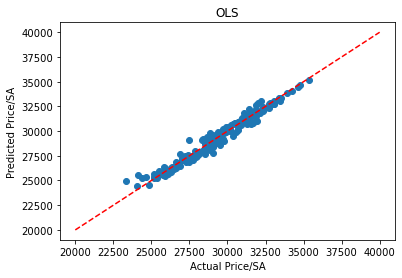

RMSE: 474.53 / MAE: 374.46 / R-squared: 0.963 / Adj. R-squared: 0.961


In [41]:
# Predict price per SA on X_test parameters
y_pred = results2.predict(X_test)

# Build a scatterplot
_ = plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([20000, 40000], [20000, 40000], 'k--', color='r')

# Label axis
plt.ylabel('Predicted Price/SA')
plt.xlabel('Actual Price/SA')
plt.title('OLS')
plt.show()

print('RMSE: {} / MAE: {} / R-squared: {} / Adj. R-squared: {}'.format(
    round(math.sqrt(mean_squared_error(y_test, y_pred)), 3), round(mean_absolute_error(y_test, y_pred), 3), round(results2.rsquared, 3), round(results2.rsquared_adj, 3)))


In [42]:
# Make price predictions for units where price list has not been released

Prediction['PL_no_PL1'] = 0
Prediction['PL_no_PL2'] = 0
Prediction['PL_no_PL3'] = 0
Prediction['PL_no_PL4'] = 0
Prediction['PL_no_PL5'] = 0
Prediction = Prediction.drop(['Price per SA', 'PL_no'],axis =1)

In [43]:
X_ho = pd.get_dummies(Prediction)

# Create constants for X, so the model knows its bounds
X_ho = sm.add_constant(X_ho)

In [44]:
# Predict price per SA on X_test parameters using second model (shape parameters need to match)
y_ho = results2.predict(X_ho)

pred = pd.concat([y_ho, Prediction], axis=1)
pred = pred.rename(columns={0: 'Predicted Price per SA'})
pred


,Predicted Price per SA,Tower,Floor,Unit,Area,No. of Rooms,PL_no_PL1,PL_no_PL2,PL_no_PL3,PL_no_PL4,PL_no_PL5
27,21811.700987,Tower 1A,5,D,444,2BR,0,0,0,0,0
127,28508.912620,Tower 1A,19,H,643,3BR,0,0,0,0,0
135,28661.882810,Tower 1A,20,H,643,3BR,0,0,0,0,0
143,28814.853001,Tower 1A,21,H,643,3BR,0,0,0,0,0
151,28967.823192,Tower 1A,22,H,643,3BR,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1042,34734.899661,Tower 2B,36,A,1018,3BR,0,0,0,0,0
1043,26713.930324,Tower 2B,36,C,459,2BR,0,0,0,0,0
1045,26484.275167,Tower 2B,36,E,452,2BR,0,0,0,0,0
1046,43314.383309,Tower 2B,36,F,1360,4BR,0,0,0,0,0
